# Problem 1A:
Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.
 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols     
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline

In [3]:
df = pd.read_csv('SalaryData.csv')

In [4]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [6]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


# 1.1.	State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

For Education,
Null Hypothesis is that mean salary of persons is independent of their Education and is observed to be equal for all Education level.

Alternate Hypothesis is that mean salary is different for all education level or for at least one Education Level

H0 : The means of 'Salary' variable, with respect to each Education level is equal.

H1 : At least one of the means of 'Salary' variable, with respect to each Education level is unequal.



For Occupation,
Null Hypothesis is that mean salary of persons is independent of their Occupation and is observed to be equal for all Occupation level.
Alternate Hypothesis is that mean salary is different for all occupation level or for at least one Occupation Level.

H0 : The means of 'Salary' varies with respect to each Occupation level is equal.
H1 : At least one of the means of 'Salary' varies with respect to each Occupation level is unequal.



# 1.2.	Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [9]:
formula = 'Salary ~ C(Education)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Based on above Anova result , calculated F value 1.257709e-08 is less than alpha 0.05 (Level of Confidence),

Hence Null Hypothesis is rejected i.e. population means for salary are not same for difference Education levels.

In other words Salary is affected by Education of person and significant factor for salary of person.

# 1.3.	Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [10]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Based on above Anova result , calculated F value 0.458508 is greater than alpha 0.05 (Level of Confidence),

Hence Null Hypothesis is accepted i.e. population means for salary are same for different Occupation levels.

In other words Salary is not affected by Occupation of person and it is not a significant factor affecting mean salary of person. 

# 1.4.	If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result

Null Hypothesis is rejected in 1.2
i.e. Mean salary of person is affected by different Education levels.

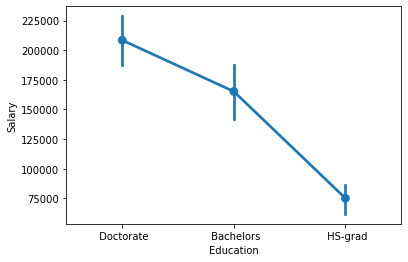

In [12]:
sns.pointplot(x='Education', y='Salary', data=DF)

From above plot we can say that , Education Class- Doctorate has significantly large mean salary compared to HS-grad Education mean salary.

# Problem 1B:

What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]
Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?
Explain the business implications of performing ANOVA for this particular case study.

# 1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

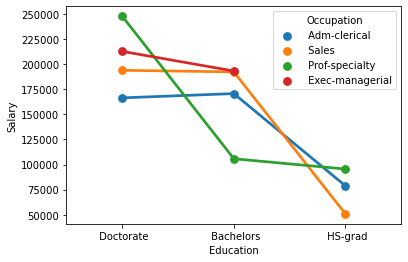

In [20]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation', ci= None)

We have observed that For each Education level there is a different mean salary which is further impacted or calibrated by different occupation levels.

That is  there is a interaction between Occupation and Education level which has an effect on Mean Salary of person.

# 1.6 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

In [23]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


Null Hypothesis is that there is not a interaction between two treatments and no effect on mean salary.

Alternate Hypothesis is that there is a interaction between two treatmenets.


H0 : The means of 'Salary' variable with respect to each Education and Occupation level is equal.

H1 : At least one of the means of 'Salary' variable with respect to each Education and Occupation level is unequal.

Here from above anova table, F value 2.232500e-05 is less than 0.05 Alpha

hence null hypothesis is rejected .

We have enough evidence that there is a interaction between two treatments and it affect the mean salary of person.

# 1.7 Explain the business implications of performing ANOVA for this particular case study.

Above ANOVA technique has helped to understand cause and effect relation amoung the independent variable Education and Occupation on Dependent variable Salary.

By one way anova , we can say that Education level has signicant impact on mean salary of person i.e. it is a significant cause of effect on mean salary of a person, but there is not enough evidence that Occupation has signifact impact on mean salary of person.

Also using a two way ANOVA we have observed that, there is a signifacnt impact of interaction between Education and occupation level on mean salary of person.